In [4]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame: df
df = pd.read_csv('../Datacamp-SupervisedLearning/dataset/gapminder.csv')
print(df.head())


   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


#### Explore the DataFrame using pandas methods

In [10]:
# show dataframe size
print('dataframe size is {} rows, {} columns'.format(df.shape[0], df.shape[1]))

dataframe size is 139 rows, 10 columns


In [11]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


##### Exploring categorical features

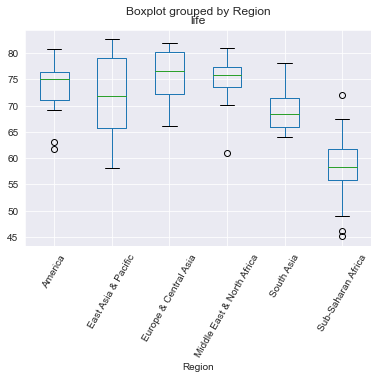

In [9]:
# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

- Here is a box plot showing how life varies by region.
- We need to encode this feature using dummy varaibles.

#### Creating dummy variables
- Scikit-learn will not accept categorical features by default.
- Need to encode categorical features numerically.
- Convert to 'dummy variables'
   -  0: Observation was not that category.
   -  1: Observation was that category


In [13]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


Now that you have created the dummy variables, you can use the 'Region' feature to predict life expectancy!

#### Regression with categorical features

In [17]:
y = df[['life']]
X = df.drop(['life', 'Region'], axis =1)

In [19]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.87758867 0.80165479 0.86362808 0.8071264  0.86761116]
